In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files

In [ ]:
bf_train_data = files.upload()

Saving train.csv to train (3).csv


In [ ]:
bf_train_data = pd.read_csv('train.csv')

In [ ]:
bf_train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
bf_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463220 entries, 0 to 463219
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     463220 non-null  int64  
 1   Product_ID                  463220 non-null  object 
 2   Gender                      463219 non-null  object 
 3   Age                         463219 non-null  object 
 4   Occupation                  463219 non-null  float64
 5   City_Category               463219 non-null  object 
 6   Stay_In_Current_City_Years  463219 non-null  object 
 7   Marital_Status              463219 non-null  float64
 8   Product_Category_1          463219 non-null  float64
 9   Product_Category_2          319301 non-null  float64
 10  Product_Category_3          141644 non-null  float64
 11  Purchase                    463219 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 42.4+ MB


In [ ]:
bf_train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            143919
Product_Category_3            321576
Purchase                           1
dtype: int64

In [ ]:
bf_train_data[bf_train_data['Gender'].isnull()].index.tolist()

[463219]

In [ ]:
bf_train_data[bf_train_data['Age'].isnull()].index.tolist()

[463219]

In [ ]:
bf_train_data = bf_train_data.drop(bf_train_data.index[463219])

In [ ]:
bf_train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            143918
Product_Category_3            321575
Purchase                           0
dtype: int64

In [ ]:
bf_train_data = bf_train_data.drop(['Product_Category_3'], axis =1)

In [ ]:
bf_train_data['Product_ID'] = bf_train_data['Product_ID'].str.replace('P00', '')

In [ ]:
#bf_train_data['Stay_In_Current_City_Years'] = bf_train_data['Stay_In_Current_City_Years'].str.replace('4+', '4')

In [ ]:
bf_train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,069042,F,0-17,10.0,A,2,0.0,3.0,NaN,8370.0
1,1000001,248942,F,0-17,10.0,A,2,0.0,1.0,6.0,15200.0
2,1000001,087842,F,0-17,10.0,A,2,0.0,12.0,NaN,1422.0
3,1000001,085442,F,0-17,10.0,A,2,0.0,12.0,14.0,1057.0
4,1000002,285442,M,55+,16.0,C,4+,0.0,8.0,NaN,7969.0


In [ ]:
bf_train_data['City_Category'].value_counts()

B    195338
C    143500
A    124381
Name: City_Category, dtype: int64

In [ ]:
bf_train_data['Occupation'].value_counts()

4.0     61117
0.0     58559
7.0     49675
1.0     39596
17.0    33693
20.0    28341
12.0    26150
14.0    23061
2.0     22421
16.0    21464
6.0     17263
3.0     14942
10.0    10874
5.0     10261
15.0    10122
11.0     9761
19.0     7142
13.0     6562
18.0     5589
9.0      5327
8.0      1299
Name: Occupation, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_cols=['Gender','City_Category','Age', 'City_Category']
le = LabelEncoder()
for i in cat_cols:
    bf_train_data[i]=le.fit_transform(bf_train_data[i])
bf_train_data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                    float64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Purchase                      float64
dtype: object

In [ ]:
bf_train_data['Product_ID'] = bf_train_data['Product_ID'].astype(int)

In [ ]:
bf_train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,69042,0,0,10.0,0,2,0.0,3.0,NaN,8370.0
1,1000001,248942,0,0,10.0,0,2,0.0,1.0,6.0,15200.0
2,1000001,87842,0,0,10.0,0,2,0.0,12.0,NaN,1422.0
3,1000001,85442,0,0,10.0,0,2,0.0,12.0,14.0,1057.0
4,1000002,285442,1,6,16.0,2,4+,0.0,8.0,NaN,7969.0


In [ ]:
bf_train_data['Stay_In_Current_City_Years'] = bf_train_data['Stay_In_Current_City_Years'].replace('4+', '4')

In [ ]:
bf_train_data['Stay_In_Current_City_Years']=bf_train_data['Stay_In_Current_City_Years'].astype(int)

In [ ]:
#bf_train_data = pd.to_numeric(bf_train_data['Stay_In_Current_City_Years']).astype(int)

In [ ]:
#bf_train_data = bf_train_data['Stay_In_Current_City_Years'].astype(int)

In [ ]:
bf_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463219 entries, 0 to 463218
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     463219 non-null  int64  
 1   Product_ID                  463219 non-null  int64  
 2   Gender                      463219 non-null  int64  
 3   Age                         463219 non-null  int64  
 4   Occupation                  463219 non-null  float64
 5   City_Category               463219 non-null  int64  
 6   Stay_In_Current_City_Years  463219 non-null  int64  
 7   Marital_Status              463219 non-null  float64
 8   Product_Category_1          463219 non-null  float64
 9   Product_Category_2          319301 non-null  float64
 10  Purchase                    463219 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 42.4 MB


In [ ]:
bf_train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,69042,0,0,10.0,0,2,0.0,3.0,NaN,8370.0
1,1000001,248942,0,0,10.0,0,2,0.0,1.0,6.0,15200.0
2,1000001,87842,0,0,10.0,0,2,0.0,12.0,NaN,1422.0
3,1000001,85442,0,0,10.0,0,2,0.0,12.0,14.0,1057.0
4,1000002,285442,1,6,16.0,2,4,0.0,8.0,NaN,7969.0


In [ ]:
!pip install fancyimpute

In [ ]:
# importing the MICE from fancyimpute library
from fancyimpute import IterativeImputer

In [ ]:
# calling the  MICE class
mice_imputer = IterativeImputer()
# imputing the missing value with mice imputer
bf_train_data_mv = mice_imputer.fit_transform(bf_train_data)

In [ ]:
bf_train_data_mv = pd.DataFrame(data = bf_train_data_mv)

In [ ]:
bf_train_data_mv.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000001.0,69042.0,0.0,0.0,10.0,0.0,2.0,0.0,3.0,8.170054,8370.0
1,1000001.0,248942.0,0.0,0.0,10.0,0.0,2.0,0.0,1.0,6.000000,15200.0
2,1000001.0,87842.0,0.0,0.0,10.0,0.0,2.0,0.0,12.0,15.731313,1422.0
3,1000001.0,85442.0,0.0,0.0,10.0,0.0,2.0,0.0,12.0,14.000000,1057.0
4,1000002.0,285442.0,1.0,6.0,16.0,2.0,4.0,0.0,8.0,13.640114,7969.0


In [ ]:
bf_train_data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [ ]:
bf_train_data_mv.columns = bf_train_data.columns

In [ ]:
bf_train_data_mv.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001.0,69042.0,0.0,0.0,10.0,0.0,2.0,0.0,3.0,8.170054,8370.0
1,1000001.0,248942.0,0.0,0.0,10.0,0.0,2.0,0.0,1.0,6.000000,15200.0
2,1000001.0,87842.0,0.0,0.0,10.0,0.0,2.0,0.0,12.0,15.731313,1422.0
3,1000001.0,85442.0,0.0,0.0,10.0,0.0,2.0,0.0,12.0,14.000000,1057.0
4,1000002.0,285442.0,1.0,6.0,16.0,2.0,4.0,0.0,8.0,13.640114,7969.0


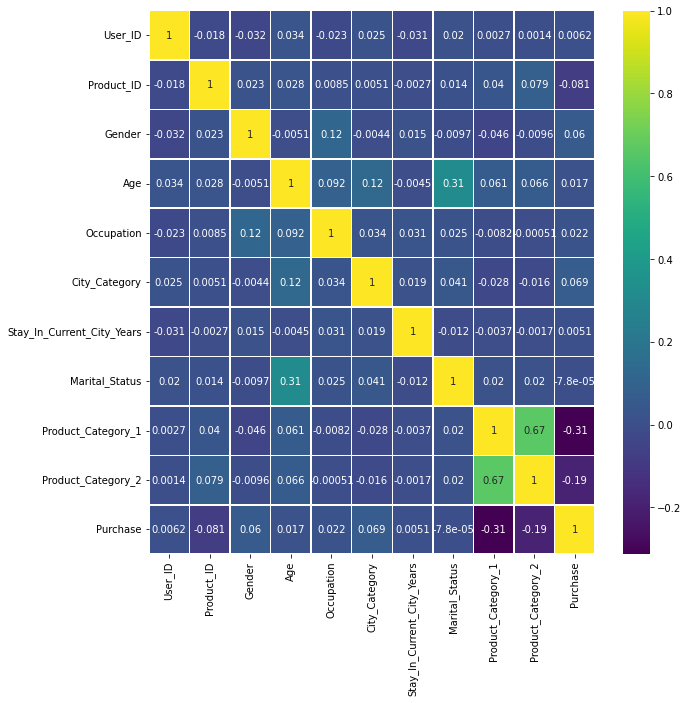

In [ ]:
plt.figure(figsize=(10,10))
cor=bf_train_data_mv.corr()
sns.heatmap(cor,annot=True,linewidths=0.5, cmap='viridis')

In [ ]:
#selecting top correlated features with target variable
cor_target = abs(cor['Purchase'])
relevant_features= cor_target[cor_target>0]
relevant_features

User_ID                       0.006182
Product_ID                    0.080568
Gender                        0.060124
Age                           0.017267
Occupation                    0.021536
City_Category                 0.068599
Stay_In_Current_City_Years    0.005086
Marital_Status                0.000078
Product_Category_1            0.313177
Product_Category_2            0.188924
Purchase                      1.000000
Name: Purchase, dtype: float64

In [ ]:
bf_train_data_mv['Marital_Status'].value_counts()

0.0    273745
1.0    189474
Name: Marital_Status, dtype: int64

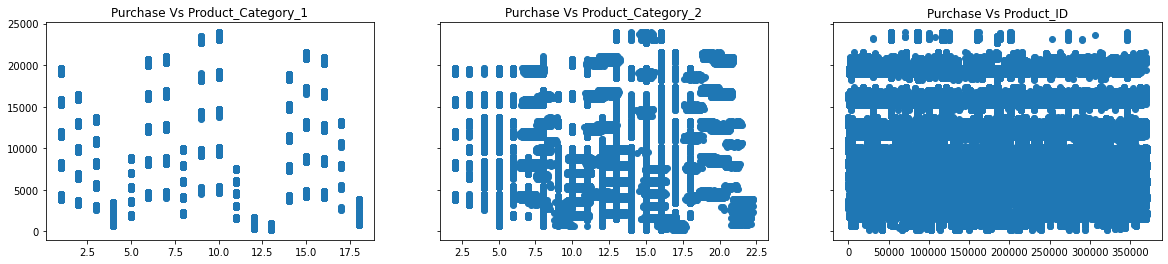

In [ ]:
m, (f1, f2, f3) = plt.subplots(1, 3, sharey=True, figsize = (20,4) ) #ploting price with year, Product_Category_2, Product_ID
f1.scatter(bf_train_data_mv['Product_Category_1'], bf_train_data_mv['Purchase'])
f1.set_title('Purchase Vs Product_Category_1')
f2.scatter(bf_train_data_mv['Product_Category_2'], bf_train_data_mv['Purchase'])
f2.set_title('Purchase Vs Product_Category_2')
f3.scatter(bf_train_data_mv['Product_ID'], bf_train_data_mv['Purchase'])
f3.set_title('Purchase Vs Product_ID')
plt.show()

In [ ]:
bf_train_data_mv['Purchase'] = np.log(bf_train_data_mv['Purchase'])

In [ ]:
bf_train_data_mv = bf_train_data_mv.rename(columns={'Purchase':'Log_Purchase'})

In [ ]:
bf_train_data_mv.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Log_Purchase
0,1000001.0,69042.0,0.0,0.0,10.0,0.0,2.0,0.0,3.0,8.170054,9.032409
1,1000001.0,248942.0,0.0,0.0,10.0,0.0,2.0,0.0,1.0,6.000000,9.629051
2,1000001.0,87842.0,0.0,0.0,10.0,0.0,2.0,0.0,12.0,15.731313,7.259820
3,1000001.0,85442.0,0.0,0.0,10.0,0.0,2.0,0.0,12.0,14.000000,6.963190
4,1000002.0,285442.0,1.0,6.0,16.0,2.0,4.0,0.0,8.0,13.640114,8.983314


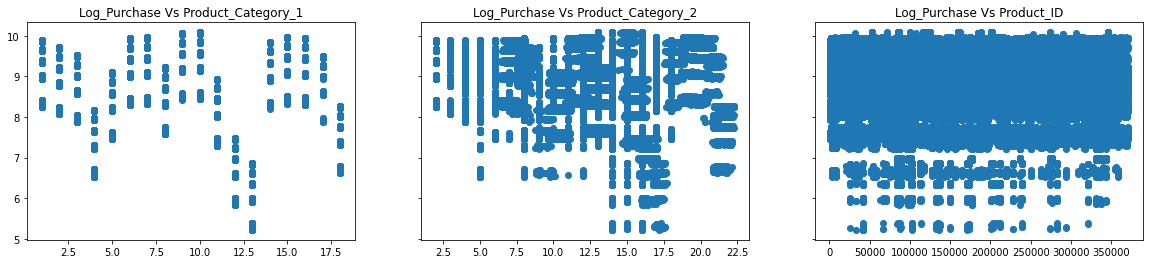

In [ ]:
m, (f1, f2, f3) = plt.subplots(1, 3, sharey=True, figsize = (20,4) ) #ploting price with year, Product_Category_2, Product_ID
f1.scatter(bf_train_data_mv['Product_Category_1'], bf_train_data_mv['Log_Purchase'])
f1.set_title('Log_Purchase Vs Product_Category_1')
f2.scatter(bf_train_data_mv['Product_Category_2'], bf_train_data_mv['Log_Purchase'])
f2.set_title('Log_Purchase Vs Product_Category_2')
f3.scatter(bf_train_data_mv['Product_ID'], bf_train_data_mv['Log_Purchase'])
f3.set_title('Log_Purchase Vs Product_ID')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


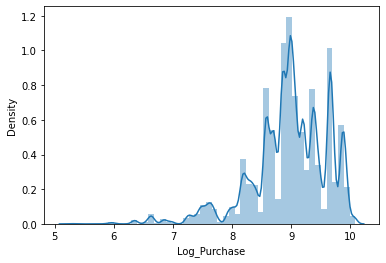

In [ ]:
sns.distplot(bf_train_data_mv['Log_Purchase'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


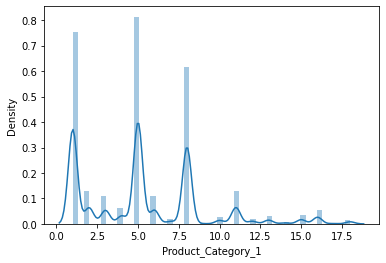

In [ ]:
sns.distplot(bf_train_data_mv['Product_Category_1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


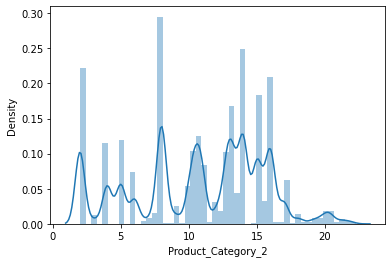

In [ ]:
sns.distplot(bf_train_data_mv['Product_Category_2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x2160 with 0 Axes>

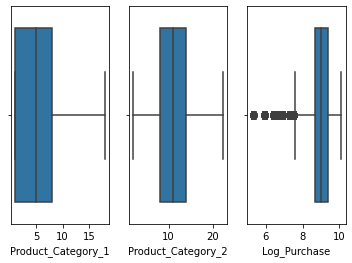

In [ ]:
plt.figure(figsize=(15, 30))
fig, ax = plt.subplots(1,3)
#plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.boxplot(bf_train_data_mv['Product_Category_1'], ax=ax[0])
sns.boxplot(bf_train_data_mv['Product_Category_2'], ax=ax[1])
sns.boxplot(bf_train_data_mv['Log_Purchase'], ax=ax[2])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


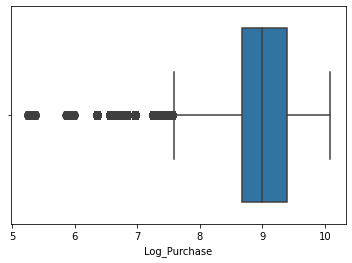

In [ ]:
sns.boxplot(bf_train_data_mv['Log_Purchase'])

In [ ]:
Q1 = bf_train_data_mv.quantile(0.25)
Q3 = bf_train_data_mv.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
((bf_train_data_mv < (Q1 - 1.5 * IQR)) | (bf_train_data_mv > (Q3 + 1.5 * IQR))).sum()

User_ID                            0
Product_ID                         0
Gender                        114040
Age                            63237
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Log_Purchase                   19829
dtype: int64

In [ ]:
bf_train_data_mv.shape

(463219, 11)

In [ ]:
19829/463219

0.04280696603550373

In [ ]:
q_low = bf_train_data_mv['Log_Purchase'].quantile(0.01)

In [ ]:
bf_train_data_cleaned = bf_train_data_mv[(bf_train_data_mv['Log_Purchase'] > q_low)]

In [ ]:
(bf_train_data_cleaned['Log_Purchase']).mean()

8.995108534977028

In [ ]:
bf_train_data_cleaned['Log_Purchase'] = np.where(bf_train_data_cleaned['Log_Purchase'] < 8, 9, bf_train_data_cleaned['Log_Purchase'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
bf_train_data_cleaned.shape

(458583, 11)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


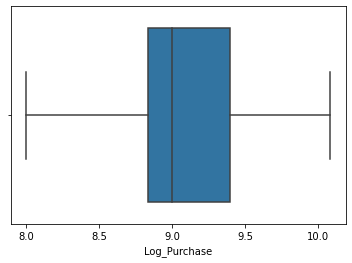

In [ ]:
sns.boxplot(bf_train_data_cleaned['Log_Purchase'])

In [ ]:
#bf_train_data_mv.drop(q_low, inplace = True)

In [ ]:
#(bf_train_data_mv['Log_Purchase']).mode()

In [ ]:
#bf_train_data_mv['Log_Purchase'] = np.where(bf_train_data_mv['Log_Purchase'] < 8, 8.9, bf_train_data_mv['Log_Purchase'])

In [ ]:
#sns.boxplot(bf_train_data_mv['Log_Purchase'])

In [ ]:
inputs = bf_train_data_cleaned.drop(['Log_Purchase'], axis=1)

In [ ]:
targets = bf_train_data_cleaned['Log_Purchase']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(inputs, targets, test_size=0.2, random_state=0)

#Linear Rgression

In [ ]:
#linear = LinearRegression()

In [ ]:
#linear.fit(x_train, y_train)

In [ ]:
#y_pred = linear.predict(x_test)

In [ ]:
#mean_squared_error(y_test,y_pred)

In [ ]:
#r2_score(y_test, y_pred)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled=StandardScaler()
x_train=scaled.fit_transform(x_train)
x_test=scaled.transform(x_test)

In [ ]:
linear = LinearRegression()

In [ ]:
linear.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear.predict(x_test)

In [ ]:
mean_squared_error(y_test,y_pred)

0.19641288262712014

In [ ]:
r2_score(y_test, y_pred)

0.08860214916501552

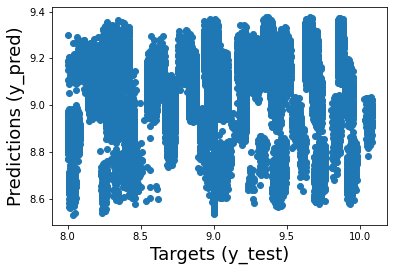

In [ ]:
plt.scatter(y_test, y_pred) #ploting the results
plt.xlabel('Targets (y_test)', size = 18)
plt.ylabel('Predictions (y_pred)', size = 18)
plt.show()

#Random Forest

In [ ]:
random = RandomForestRegressor()

In [ ]:
random.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_ran = random.predict(x_test)

In [ ]:
mean_squared_error(y_pred_ran, y_test)

0.07451899369086722

In [ ]:
r2_score(y_pred_ran, y_test)

0.5029268389206568

#Support Vector Machine

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR(kernel='rbf')

In [ ]:
svm.fit(x_train,y_train)

NameError: ignored